In [ ]:
# @title INSTALL LIBRARY
!pip install matplotlib-venn
!pip install pyspark
!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install requests
!pip install pillow
!pip install rasterio
import pyspark
import pandas as pd
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("Left Join Example").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=75b58ce2e8b499f3163350e9281db9d66b667244cdbba2395bc9b5a74b45b546
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 47.9 MB/s eta 0:00:00


In [ ]:
# @title Imports
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession
import pandas as pd
from google.colab import files
from PIL import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
from pyspark.sql.types import StringType, DoubleType
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# @title DATASET ACQ
# import requests

# # URL of the dataset file
# url = "https://shefuni.maps.arcgis.com/apps/webappviewer/index.html?id=98462998953c4f1fbd7caaa166373f63"  # Replace with the actual URL

# # Send a GET request to the URL
# response = requests.get(url)

# # Check if the request was successful (status code 200)
# if response.status_code == 200:
#     # Save the content of the response (dataset file) to a local file
#     with open("dataset.csv", "wb") as file:
#         file.write(response.content)
#     print("Dataset file downloaded successfully.")
# else:
#     print("Failed to download dataset file.")

In [ ]:
# @title Session builder
# ADITI SINGH, GAURANG PANPALIA, URVA DHORIYANI, RUSHA MAITI, VANSH DALAL
# Create SparkSession
spark = SparkSession.builder.appName("Landslide Prediction").getOrCreate()

In [ ]:
# @title DATA_ACQ_LANDSLIDE not req now(tentative)
# # df= pd.read_csv("landslide_dataset.csv") with pandas
# ls_data = spark.read.csv("/content/landslide_dataset.csv", header=True, inferSchema=True) # with pyspark
# ls_data.show()

In [ ]:
# @title DATA_MANIP (err- maybe not req)
# ls_data = ls_data.dropna()

# # One-hot encode categorical data
# encoder = OneHotEncoder(sparse=False)
# soil_type = encoder.fit_transform(ls_data[['Soil Type']])
# climate = encoder.fit_transform(ls_data[['Climate']])

# # Combine the encoded data with the original data
# ls_data = pd.concat([ls_data, pd.DataFrame(soil_type, columns=encoder.categories_[0])], axis=1)
# ls_data = pd.concat([ls_data, pd.DataFrame(climate, columns=encoder.categories_[1])], axis=1)
# ls_data = ls_data.drop(['Soil Type', 'Climate'], axis=1)



# # Drop rows with missing values
# ls_data = ls_data.na.drop()

# # One-hot encode categorical data
# soil_type_indexer = StringIndexer(inputCol="Soil Type", outputCol="soil_type_index")
# soil_type_encoded = OneHotEncoderEstimator(inputCols=[soil_type_indexer.getOutputCol()], outputCols=["soil_type_" + str(i) for i in range(soil_type_indexer.numLabels)])
# soil_type_model = soil_type_encoded.fit(ls_data)
# soil_type_data = soil_type_model.transform(soil_type_indexer.transform(ls_data))

# climate_indexer = StringIndexer(inputCol="Climate", outputCol="climate_index")
# climate_encoded = OneHotEncoderEstimator(inputCols=[climate_indexer.getOutputCol()], outputCols=["climate_" + str(i) for i in range(climate_indexer.numLabels)])
# climate_model = climate_encoded.fit(soil_type_data)
# climate_data = climate_model.transform(climate_indexer.transform(soil_type_data))

# # Drop the original categorical columns
# climate_data = climate_data.drop("Soil Type", "Climate")




# Drop rows with missing values
ls_data = ls_data.na.drop()

# One-hot encode categorical data
soil_type_vectorizer = CountVectorizer(inputCol="Soil Type", outputCol="soil_type_vector")
soil_type_model = soil_type_vectorizer.fit(ls_data)
soil_type_data = soil_type_model.transform(ls_data)

climate_vectorizer = CountVectorizer(inputCol="Climate", outputCol="climate_vector")
climate_model = climate_vectorizer.fit(soil_type_data)
climate_data = climate_model.transform(soil_type_data)

# Drop the original categorical columns
climate_data = climate_data.drop("Soil Type", "Climate")

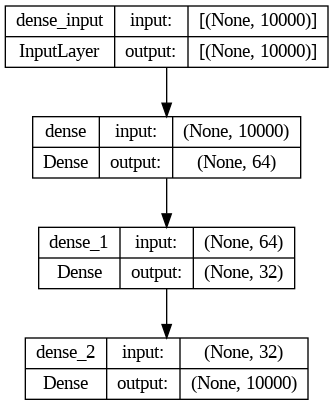

In [ ]:
# @title plot and compile NEURAL NET - comp vis part(not currently in use)-err
input_size= 10000
output_size= 10000
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Plot the graph of the model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# @title gene simu model- comp vis conti (err)
# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    # Perform object detection and movement tracking here

    # Display the frame
    cv2.imshow('Frame', frame)

    # Check for key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture
cap.release()
cv2.destroyAllWindows()

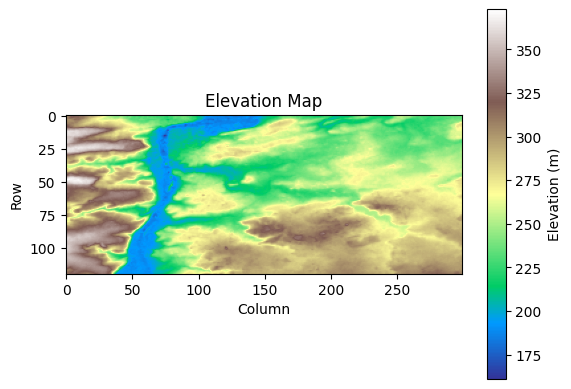

In [ ]:
# @title topo elevation plot
from osgeo import gdal
from osgeo import gdalconst
import matplotlib.pyplot as plt

# Load TIFF file
tif_file = "/content/topo.tif"
dem_dataset = gdal.Open(tif_file, gdalconst.GA_ReadOnly)

if dem_dataset is None:
    print("Error: Failed to open TIFF file")
else:
    # Read elevation data
    elevation_band = dem_dataset.GetRasterBand(1)
    elevation_data = elevation_band.ReadAsArray()
    elevation_nodata = elevation_band.GetNoDataValue()
    x_res = dem_dataset.GetGeoTransform()[1]
    y_res = -dem_dataset.GetGeoTransform()[5]

    # Mask nodata values
    elevation_data = np.ma.masked_equal(elevation_data, elevation_nodata)

    # Compute topographic attributes
    # Example: compute_slope_aspect(), compute_curvature(), compute_flow_direction(), compute_contributing_area()

    # Visualize the results
    # Example: plot_slope_aspect(), plot_curvature(), plot_flow_direction(), plot_contributing_area()
    # Close dataset
    dem_dataset = None

plt.imshow(elevation_data, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()


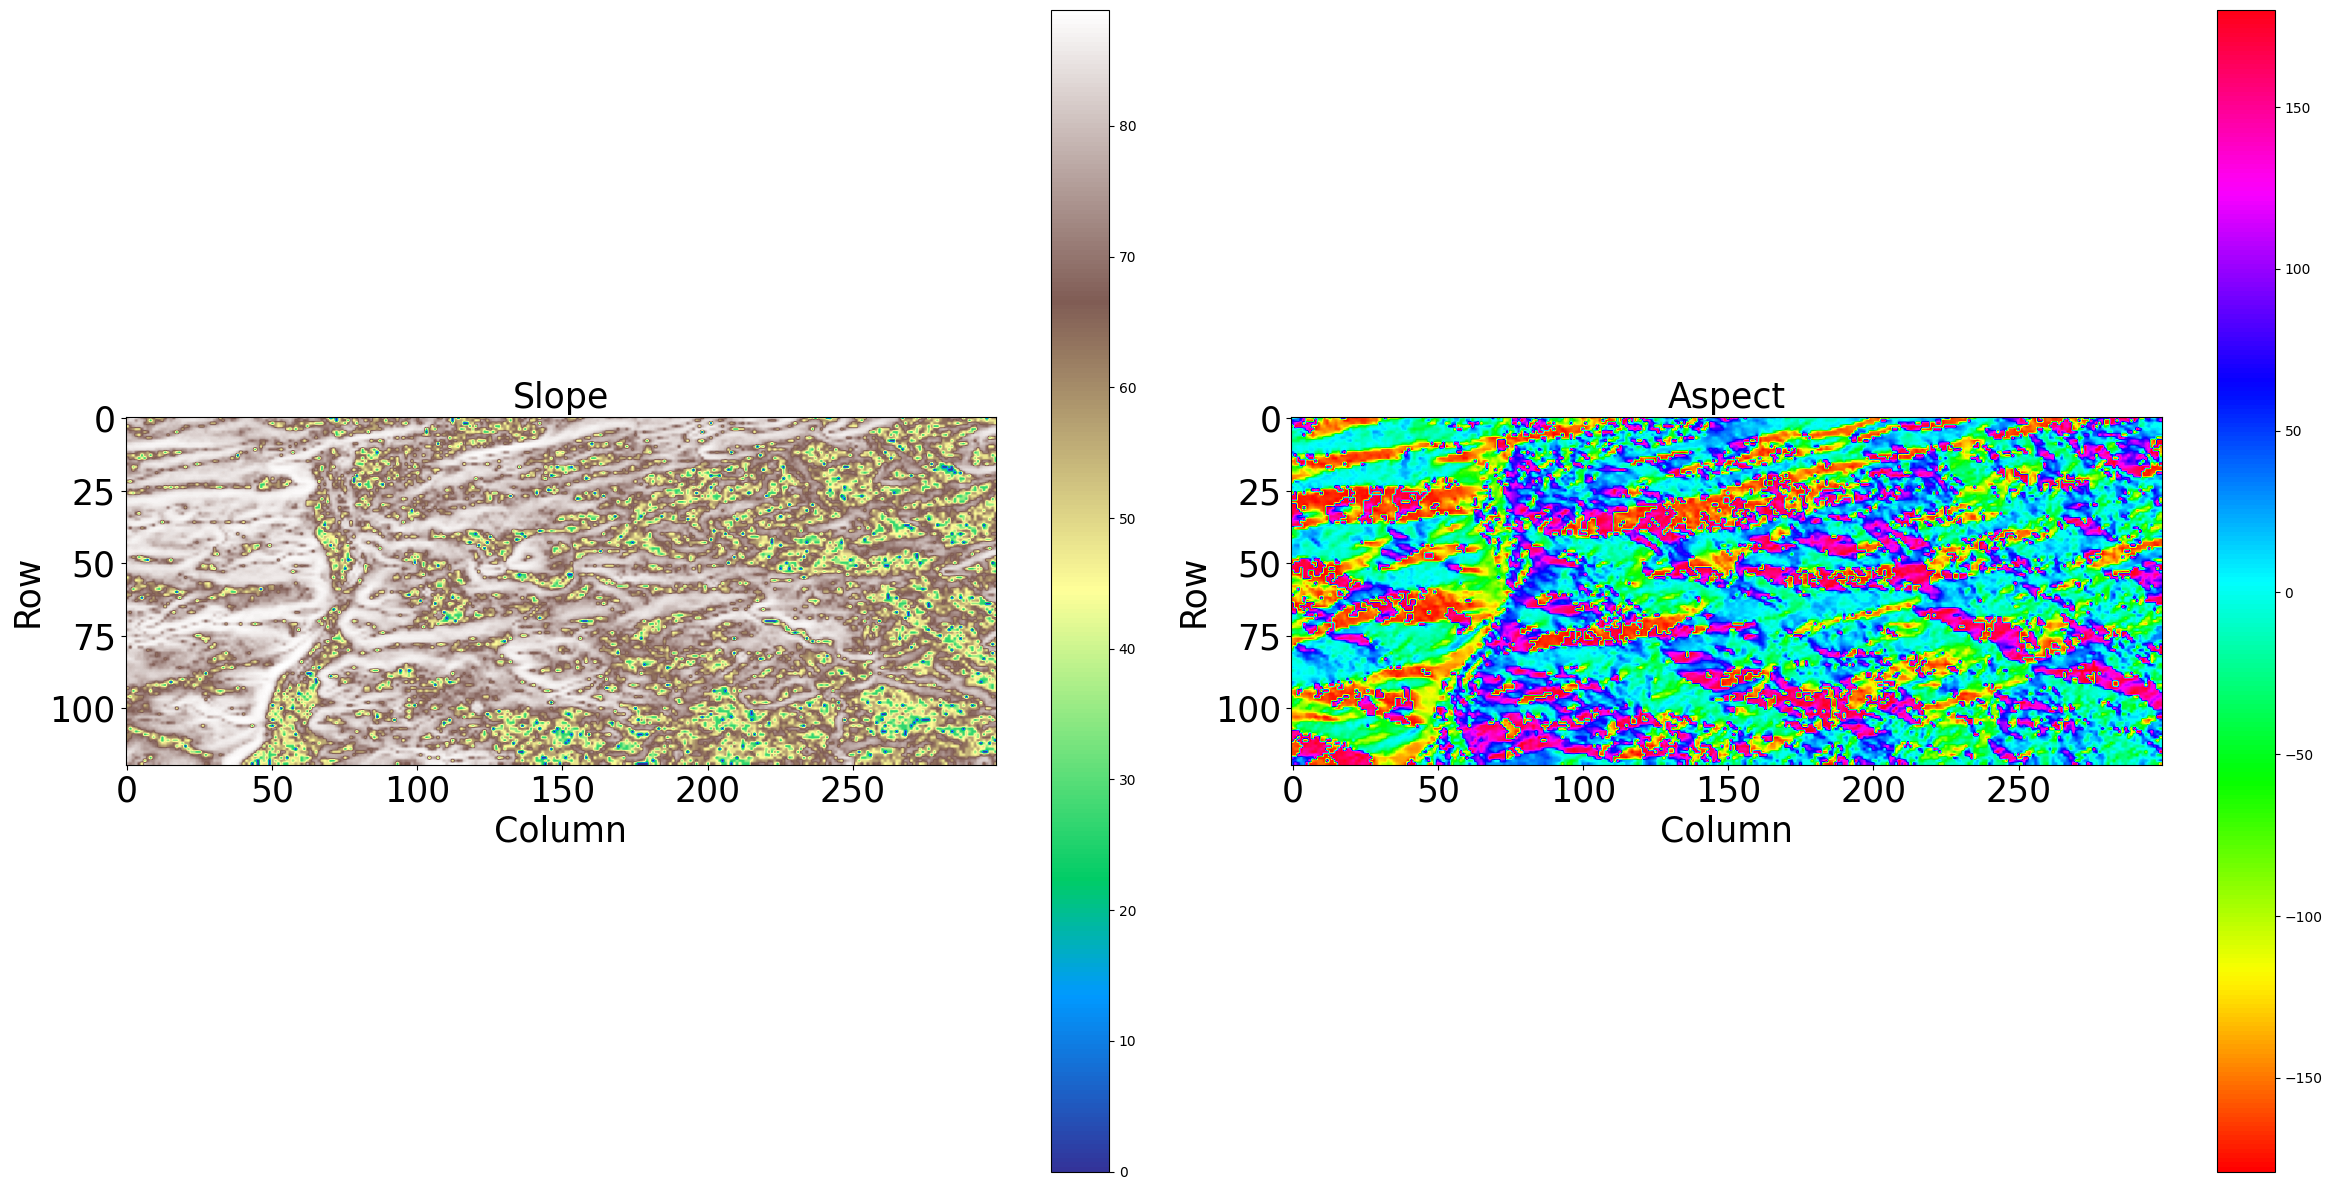

In [ ]:
# @title topo- slope and aspect
from osgeo import gdal
from osgeo import gdalconst

# Function to compute slope and aspect
def compute_slope_aspect(elevation_array):
    dx, dy = np.gradient(elevation_array)
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(dy, dx)
    return np.degrees(slope), np.degrees(aspect)

# Open the TIFF file
tif_file = "/content/topo.tif"
dataset = gdal.Open(tif_file, gdalconst.GA_ReadOnly)

if dataset is None:
    print("Error: Failed to open TIFF file")
else:
    # Read elevation data
    elevation_band = dataset.GetRasterBand(1)
    elevation_array = elevation_band.ReadAsArray()
    nodata_value = elevation_band.GetNoDataValue()

    # Compute slope and aspect
    slope, aspect = compute_slope_aspect(elevation_array)

    fig, axes = plt.subplots(1, 2, figsize=(24, 12))

    # Plot slope
    slope_png= axes[0].imshow(slope, cmap='terrain')
    axes[0].set_title('Slope', fontsize= 25)
    axes[0].set_xlabel('Column', fontsize= 25)
    axes[0].set_ylabel('Row', fontsize= 25)
    axes[0].tick_params(axis='both', which='major', labelsize=25)
    fig.colorbar(slope_png, ax=axes[0])


    # Plot aspect
    asp_png= axes[1].imshow(aspect, cmap='hsv')
    axes[1].set_title('Aspect', fontsize= 25)
    axes[1].set_xlabel('Column', fontsize= 25)
    axes[1].set_ylabel('Row', fontsize= 25)
    axes[1].tick_params(axis='both', which='major', labelsize=25)
    fig.colorbar(asp_png, ax=axes[1])

    slope_asp_fig= '/content/slope_asp.png'
    fig.savefig(slope_asp_fig)

    plt.tight_layout()
    plt.show()

    # Close dataset
    dataset = None


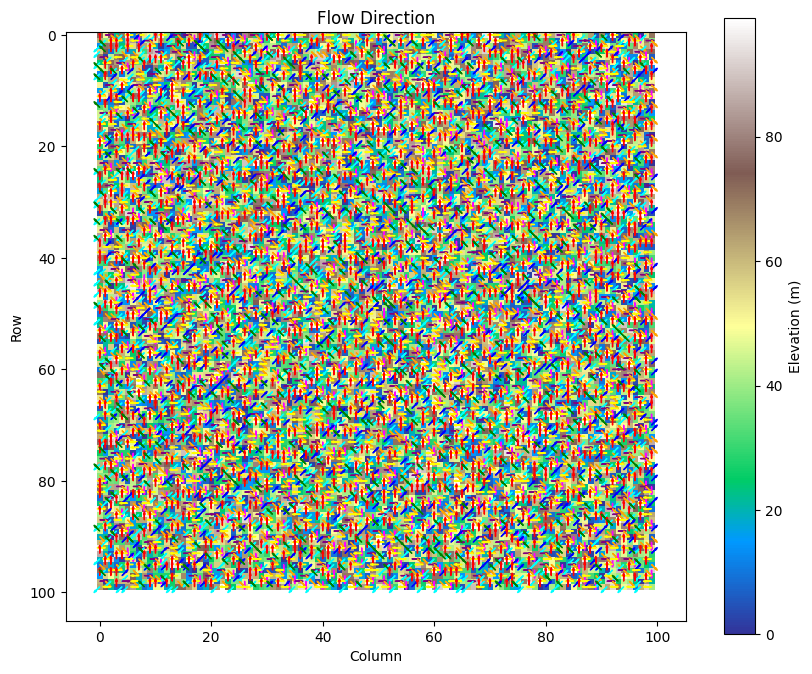

<Figure size 640x480 with 0 Axes>

In [ ]:
# @title Water flow and accumulation simulation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Function to compute flow direction using D8 algorithm
def compute_flow_direction(elevation_data):
    rows, cols = elevation_data.shape
    flow_direction = np.zeros_like(elevation_data, dtype=np.int32)

    # Define neighbor offsets for 8 adjacent cells (D8 algorithm)
    d8_offsets = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j)!= (0, 0)]

    for i in range(rows):
        for j in range(cols):
            # Compute gradient and find steepest descent neighbor
            max_slope = 0
            max_slope_index = -1

            for idx, (di, dj) in enumerate(d8_offsets):
                ni, nj = i + di, j + dj

                if 0 <= ni < rows and 0 <= nj < cols:
                    slope = (elevation_data[ni, nj] - elevation_data[i, j]) / np.sqrt(di**2 + dj**2)

                    if slope > max_slope:
                        max_slope = slope
                        max_slope_index = idx

            # Assign flow direction based on steepest descent neighbor
            if max_slope_index!= -1:
                flow_direction[i, j] = max_slope_index + 1  # Add 1 to index to convert to 1-based indexing

    return flow_direction

# Function to get next cell based on flow direction
def get_next_cell(i, j, flow_direction):
    d8_offsets = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    di, dj = d8_offsets[flow_direction - 1]
    return i + di, j + dj

# Function to compute slope and aspect
def compute_slope_aspect(elevation_data):
    rows, cols = elevation_data.shape
    slope_data = np.zeros_like(elevation_data)
    aspect_data = np.zeros_like(elevation_data)

    # Define neighbor offsets for 8 adjacent cells (D8 algorithm)
    d8_offsets = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j)!= (0, 0)]

    for i in range(rows):
        for j in range(cols):
            max_slope = 0
            max_aspect = 0

            for idx, (di, dj) in enumerate(d8_offsets):
                ni, nj = i + di, j + dj

                if 0 <= ni < rows and 0 <= nj < cols:
                    slope = (elevation_data[ni, nj] - elevation_data[i, j]) / np.sqrt(di**2 + dj**2)

                    if slope > max_slope:
                        max_slope = slope
                        max_aspect = idx

            slope_data[i, j] = max_slope
            aspect_data[i, j] = max_aspect

    return slope_data, aspect_data

# Simulate water flow based on rainfall and topographic data
def simulate_water_flow(rainfall_data, elevation_data, slope_data, aspect_data, flow_direction_data):
    rows, cols = elevation_data.shape
    water_flow_data = np.zeros_like(rainfall_data)

    # Iterate over each cell
    for i in range(rows):
        for j in range(cols):
            # Compute water flow based on rainfall intensity and flow direction
            flow_direction = flow_direction_data[i, j]
            if flow_direction!= 0:
                ni, nj = get_next_cell(i, j, flow_direction)
                if 0 <= ni < rows and 0 <= nj < cols:
                    water_flow_data[ni, nj] += rainfall_data[i, j]

    return water_flow_data

# Read rainfall data and elevation data (if not already available)
rainfall_data = np.random.randint(0, 10, size=(100, 100))  # Example random rainfall data
elevation_data = np.random.randint(0, 100, size=(100, 100))  # Example random elevation data

# Compute topographic attributes: slope, aspect, and flow direction
slope_data, aspect_data = compute_slope_aspect(elevation_data)
flow_direction_data = compute_flow_direction(elevation_data)

# Simulate water flow based on rainfall and topographic data
water_flow_data = simulate_water_flow(rainfall_data, elevation_data, slope_data, aspect_data, flow_direction_data)

# Visualize results flow paths, accumulation areas, etc.)

# Function to visualize flow direction data
def visualize_flow_direction(elevation_data, flow_direction_data):
    # Define colors for elevation map
    cmap = plt.cm.terrain
    norm = plt.Normalize(vmin=np.min(elevation_data), vmax=np.max(elevation_data))

    # Create a custom colormap for flow direction arrows
    colors = ['blue', 'red', 'green', 'yellow', 'cyan', 'magenta', 'orange', 'purple']
    cmap_arrows = LinearSegmentedColormap.from_list('flow_direction', colors, N=8)

    # Plot elevation map
    plt.figure(figsize=(10, 8))
    plt.imshow(elevation_data, cmap=cmap, norm=norm)
    plt.colorbar(label='Elevation (m)')

    # Plot flow direction arrows
    rows, cols = elevation_data.shape
    for i in range(rows):
        for j in range(cols):
            direction = flow_direction_data[i, j]
            if direction > 0:
                plt.arrow(j, i, np.cos(np.pi * direction / 4), -np.sin(np.pi * direction / 4),
                          color=cmap_arrows(direction - 1), head_width=0.3, head_length=0.5)

    plt.title('Flow Direction')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

# Usage
visualize_flow_direction(elevation_data, flow_direction_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Function to compute flow direction using D8 algorithm
def compute_flow_direction(elevation_data):
    rows, cols = elevation_data.shape
    flow_direction = np.zeros_like(elevation_data, dtype=np.int32)

    # Define neighbor offsets for 8 adjacent cells (D8 algorithm)
    d8_offsets = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j) != (0, 0)]

    for i in range(rows):
        for j in range(cols):
            max_slope = 0
            max_slope_index = -1

            for idx, (di, dj) in enumerate(d8_offsets):
                ni, nj = i + di, j + dj

                if 0 <= ni < rows and 0 <= nj < cols:
                    slope = (elevation_data[i, j] - elevation_data[ni, nj]) / np.sqrt(di**2 + dj**2)

                    if slope > max_slope:
                        max_slope = slope
                        max_slope_index = idx

            if max_slope_index != -1:
                flow_direction[i, j] = max_slope_index + 1  # 1-based indexing

    return flow_direction

# Function to get next cell based on flow direction
def get_next_cell(i, j, flow_direction):
    d8_offsets = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    di, dj = d8_offsets[flow_direction - 1]
    return i + di, j + dj

# Simulate water flow accumulation based on rainfall and elevation data
def simulate_water_flow(rainfall_data, elevation_data, flow_direction_data):
    rows, cols = elevation_data.shape
    water_flow_data = np.zeros_like(rainfall_data, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            water_flow_data[i, j] = rainfall_data[i, j]
            ci, cj = i, j
            while flow_direction_data[ci, cj] != 0:
                ni, nj = get_next_cell(ci, cj, flow_direction_data[ci, cj])
                if 0 <= ni < rows and 0 <= nj < cols:
                    water_flow_data[ni, nj] += water_flow_data[ci, cj]
                    ci, cj = ni, nj
                else:
                    break

    return water_flow_data

# Simulate debris flow based on water flow and elevation data
def simulate_debris_flow(rainfall_data, elevation_data, flow_direction_data, rocky_soil_factor=0.5):
    rows, cols = elevation_data.shape
    debris_flow_data = np.zeros_like(rainfall_data, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            debris_flow_data[i, j] = rainfall_data[i, j] * rocky_soil_factor
            ci, cj = i, j
            while flow_direction_data[ci, cj] != 0:
                ni, nj = get_next_cell(ci, cj, flow_direction_data[ci, cj])
                if 0 <= ni < rows and 0 <= nj < cols:
                    debris_flow_data[ni, nj] += debris_flow_data[ci, cj]
                    ci, cj = ni, nj
                else:
                    break

    return debris_flow_data

# Read rainfall and elevation data (example random data)
rainfall_data = np.random.randint(0, 10, size=(100, 100))
elevation_data = np.random.randint(0, 100, size=(100, 100))

# Compute flow direction
flow_direction_data = compute_flow_direction(elevation_data)

# Simulate water flow
water_flow_data = simulate_water_flow(rainfall_data, elevation_data, flow_direction_data)

# Simulate debris flow
rocky_soil_factor = 0.5  # Factor to account for rocky soil characteristics
debris_flow_data = simulate_debris_flow(rainfall_data, elevation_data, flow_direction_data, rocky_soil_factor)

# Function to visualize debris flow
def visualize_debris_flow(elevation_data, debris_flow_data):
    cmap = plt.cm.inferno
    norm = plt.Normalize(vmin=np.min(debris_flow_data), vmax=np.max(debris_flow_data))

    plt.figure(figsize=(10, 8))
    plt.imshow(debris_flow_data, cmap=cmap, norm=norm)
    plt.colorbar(label='Debris Flow Accumulation')
    plt.title('Debris Flow Accumulation')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

# Example usage
visualize_debris_flow(elevation_data, debris_flow_data)



<ipython-input-20-0d263b81c3a6>:51: RuntimeWarning: overflow encountered in scalar add
  water_flow_data[ni, nj] += water_flow_data[ci, cj]


In [ ]:
# # # @title landslide gene based on topo map
# # # import rasterio
# # # from rasterio.transform import from_origin

# # # # Function to read GeoTIFF image and obtain elevation data
# # # def read_geotiff(filename):
# # #     with rasterio.open(filename) as src:
# # #         elevation_data = src.read(1)  # Read the first band (assuming it contains elevation data)
# # #         transform = src.transform  # Get the transform for coordinates conversion
# # #     return elevation_data, transform

# # # # Function to determine latitude and longitude coordinates
# # # def get_coordinates(transform, row, col):
# # #     lon, lat = transform * (col, row)
# # #     return lat, lon

# # # # Function to compute slope from elevation data
# # # def compute_slope(elevation_data):
# # #     # Compute slope using numpy gradient function
# # #     slope_x, slope_y = np.gradient(elevation_data)
# # #     slope = np.sqrt(slope_x**2 + slope_y**2)
# # #     return slope

# # # # Function to generate landslide points
# # # def generate_landslide_points(elevation_data, transform, climate_data, soil_data, humidity_data):
# # #     slope_data = compute_slope(elevation_data)
# # #     rows, cols = elevation_data.shape
# # #     landslide_points = []

# # #     for row in range(rows):
# # #         for col in range(cols):
# # #             # Determine latitude and longitude coordinates
# # #             lat, lon = get_coordinates(transform, row, col)

# #             # Determine climate, soil type, and humidity values (if available)
# #             climate = climate_data[row, col] if climate_data is not None else None
# #             soil_type = soil_data[row, col] if soil_data is not None else None
# #             humidity = humidity_data[row, col] if humidity_data is not None else None

# #             # Determine landslide occurrence based on slope and other factors (e.g., thresholds)
# #             # For demonstration purposes, assume landslide occurs if slope exceeds a threshold
# #             landslide_occurrence = slope_data[row, col] > 30  # Example threshold (adjust as needed)

# #             # Append attributes to landslide points list
# #             landslide_points.append({
# #                 'Latitude': lat,
# #                 'Longitude': lon,
# #                 'Climate': climate,
# #                 'Soil Type': soil_type,
# #                 'Humidity': humidity,
# #                 'Slope': slope_data[row, col],
# #                 'Landslide Occurrence': landslide_occurrence
# #             })

# #     return landslide_points

# # # Example usage:
# # # Read GeoTIFF image and obtain elevation data and transform
# # elevation_data, transform = read_geotiff('topo.tif')

# # # Assume climate, soil, and humidity data are also available (replace with actual data if available)
# # climate_data = np.random.choice(['tropical'], size=elevation_data.shape)
# # soil_data = np.random.choice(['rocky'], size=elevation_data.shape)
# # humidity_data = np.random.uniform(1, 100, size=elevation_data.shape)

# # # Generate landslide points
# # landslide_points = generate_landslide_points(elevation_data, transform, climate_data, soil_data, humidity_data)

# # # Convert landslide points to DataFrame for easier manipulation
# # landslide_df = pd.DataFrame(landslide_points)

# # # Display the DataFrame containing landslide points
# # print(landslide_df)
# # # Save landslide points data to a CSV file
# # landslide_df.to_csv('landslide_points.csv', index=False)

# # # from google.colab import files
# # # files.download('landslide_points.csv')

# landslide_df= spark.read.csv("/content/landslide_points.csv", header=True, inferSchema=True) # with pyspark
# display(landslide_df)
# landslide_df.show()

DataFrame[Latitude: double, Longitude: double, Climate: string, Soil Type: string, Humidity: double, Slope: double, Landslide Occurrence: boolean]

+-----------------+------------------+--------+---------+------------------+------------------+--------------------+
|         Latitude|         Longitude| Climate|Soil Type|          Humidity|             Slope|Landslide Occurrence|
+-----------------+------------------+--------+---------+------------------+------------------+--------------------+
|50.10041666666892| 14.34958333328916|tropical|    rocky| 47.96533852153043|               5.0|               false|
|50.10041666666892|14.350416666622493|tropical|    rocky|55.977917349586505|  14.0089257261219|               false|
|50.10041666666892|14.351249999955828|tropical|    rocky| 68.36900630330045|19.235384061671343|               false|
|50.10041666666892| 14.35208333328916|tropical|    rocky|54.388384347070335|14.317821063276353|               false|
|50.10041666666892|14.352916666622493|tropical|    rocky| 32.88273918598408| 4.924428900898052|               false|
|50.10041666666892|14.353749999955827|tropical|    rocky| 27.026

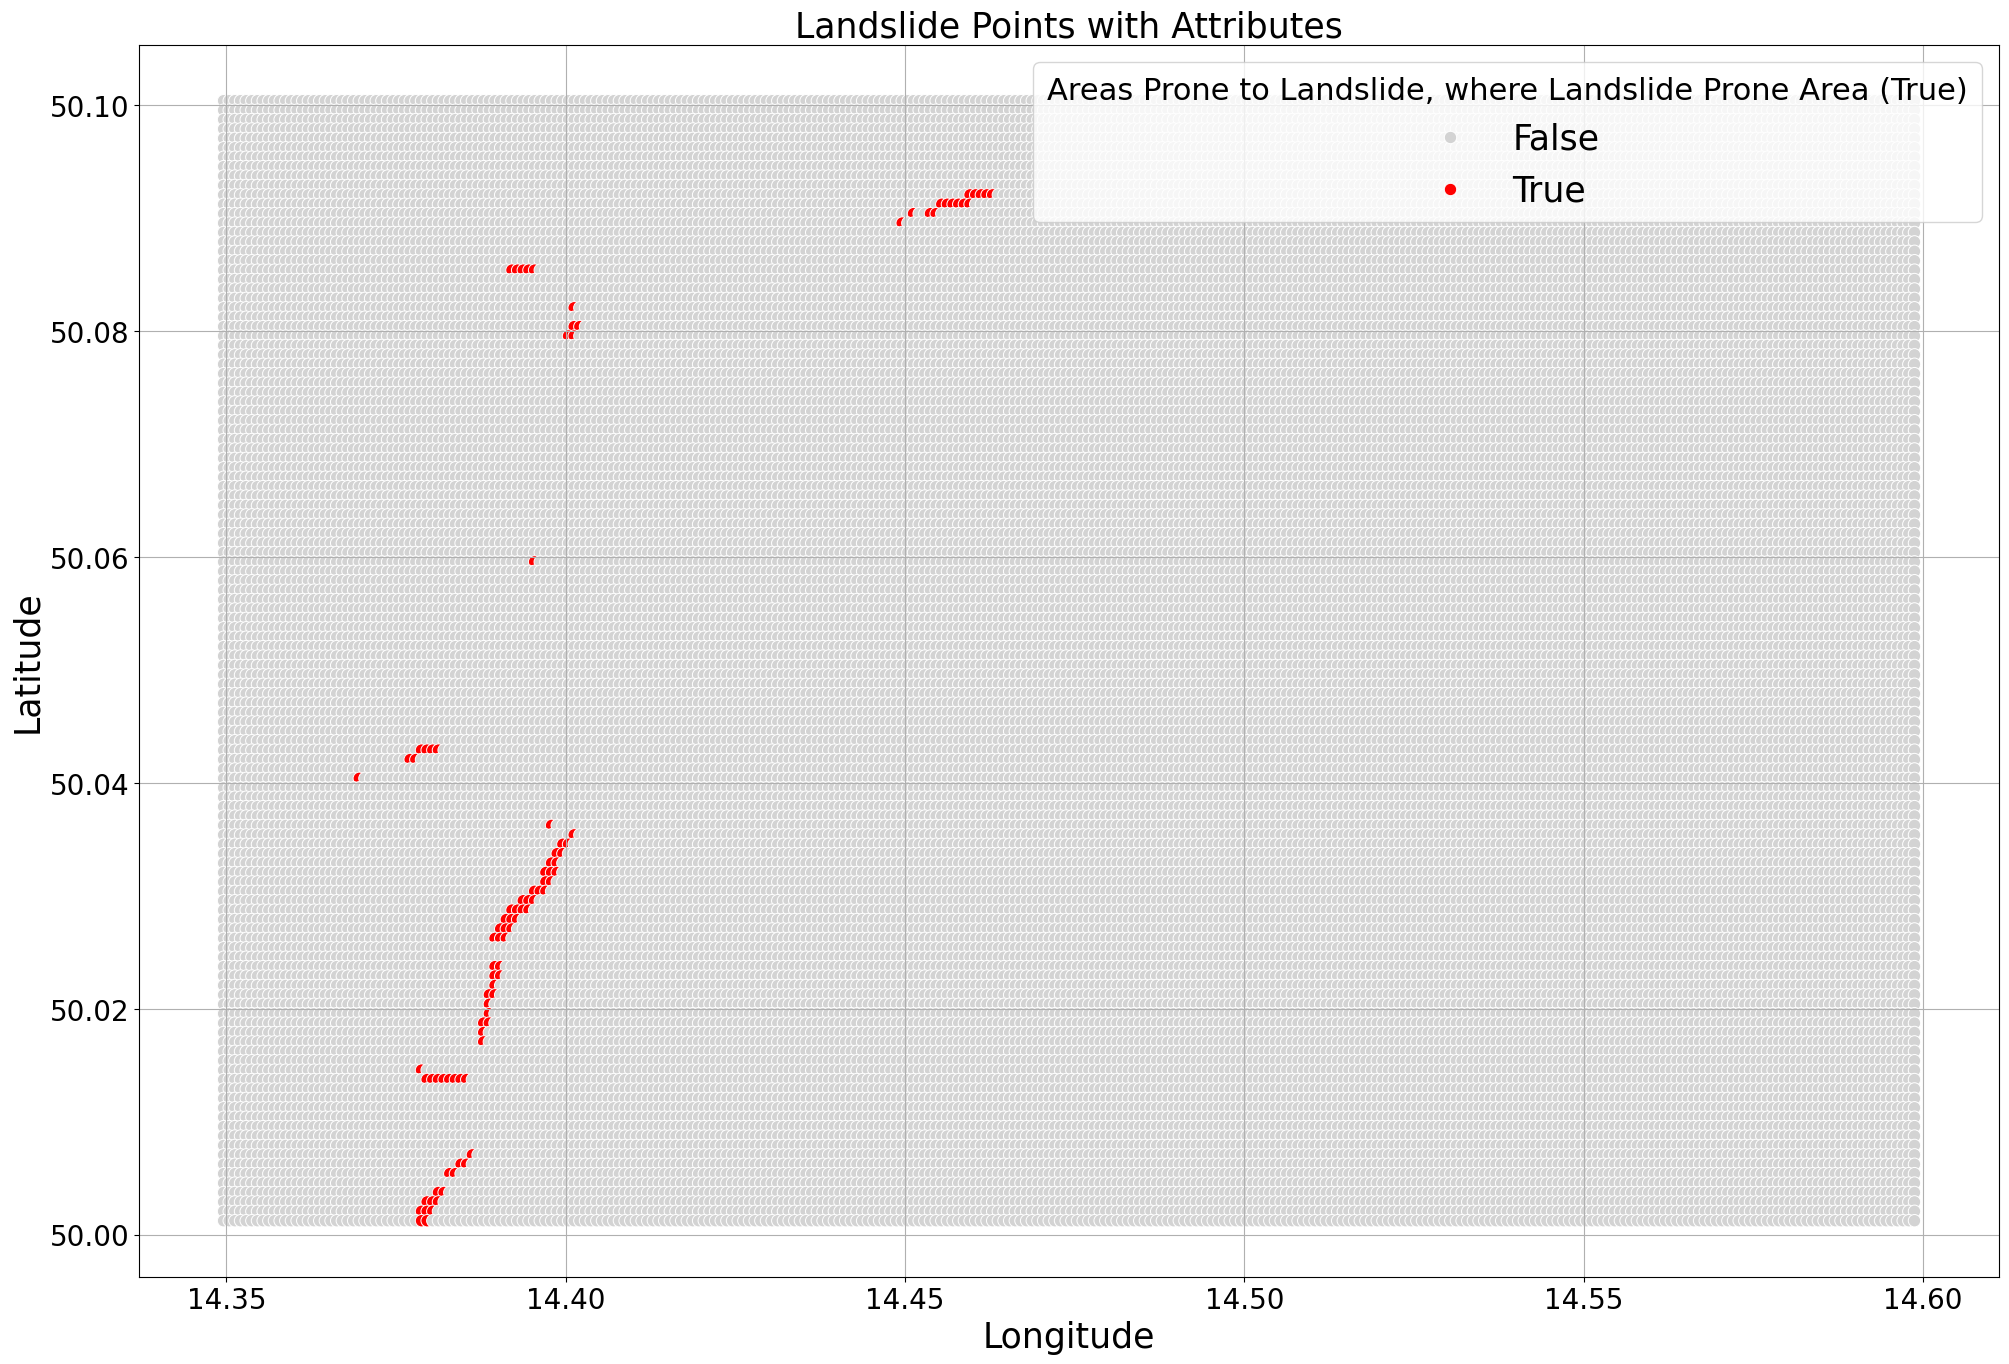

In [ ]:
# @title plot landslide
import seaborn as sns

# Plot landslide points
def plot_landslide_points(landslide_df,ls_plt= 'ls_plt.png'):
    # Convert PySpark DataFrame to pandas DataFrame
    pandas_df = landslide_df.toPandas()

    # Set up the figure and axis
    plt.figure(figsize=(24, 16))

    # Define custom colors for True (red) and False (lighter beige)
    custom_palette = {True: 'red', False: '#D3D3D3'}  # Hex code for lighter beige
#DECCCa
    # Plot points with different colors based on landslide occurrence
    sns.scatterplot(data=pandas_df, x='Longitude', y='Latitude', hue='Landslide Occurrence', palette=custom_palette, s=80, alpha=1)

    # Add title and labels
    plt.title('Landslide Points with Attributes', fontsize= "25")
    plt.xlabel('Longitude', fontsize="25")
    plt.ylabel('Latitude', fontsize="25")
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    # Add legend
    plt.legend(title='Areas Prone to Landslide, where Landslide Prone Area (True)', loc='upper right', fontsize= "25", title_fontsize="22")

    # Plot the generated landslide points
    plt.savefig(ls_plt)
    # Show the plot
    plt.grid(True)
    plt.show()

plot_landslide_points(landslide_df, ls_plt='/content/ls_plt.png')


In [ ]:


# # Function to generate a synthetic dataset
# def generate_synthetic_dataset(num_samples=1000, image_shape=(28, 28), num_classes=10):
#     # Generate random images
#     images = np.random.randint(0, 256, size=(num_samples, *image_shape), dtype=np.uint8)

#     # Generate random labels
#     labels = np.random.randint(0, num_classes, size=num_samples)

#     return images, labels

# # Load the synthetic dataset
# images, labels = generate_synthetic_dataset(num_samples=1000, image_shape=(28, 28), num_classes=10)

# # Flatten the images
# images_flattened = images.reshape(images.shape[0], -1)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

# # Define and train the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print('Test accuracy:', accuracy)


Test accuracy: 0.07


In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# # Function to generate synthetic images with and without landslides
# def generate_sample_data(num_samples, image_size=(64, 64)):
#     images = []
#     labels = []

#     for _ in range(num_samples):
#         # Generate a random landscape image
#         landscape = np.random.randint(0, 256, size=(image_size[0], image_size[1], 3), dtype=np.uint8)

#         # Simulate a landslide in random location
#         landslide_location = np.random.randint(0, 2)  # 0 or 1
#         if landslide_location == 1:
#             # Add landslide to the landscape
#             landslide_color = (255, 0, 0)  # Red color marker
#             landslide_position = (np.random.randint(0, image_size[1]), np.random.randint(0, image_size[0]))

#             cv2.circle(landscape, landslide_position, radius=2, color=landslide_color, thickness=-1)

#             # Set label to 1 indicating presence of landslide
#             label = 1
#         else:
#             # Set label to 0 indicating no landslide
#             label = 0

#         images.append(landscape)
#         labels.append(label)

#     return np.array(images), np.array(labels)

# # Generate sample dataset
# num_samples = 1000
# images, labels = generate_sample_data(num_samples)
# print(images[1])
# # Visualize some sample images
# plt.figure(figsize=(10, 10))
# for i in range(10):
#     plt.subplot(1, 10, i+1)
#     plt.imshow(images[i])
#     plt.title('Label: {}'.format(labels[i]))
#     plt.axis('off')
# plt.show()


In [ ]:
# # Load the dataset
# data = pd.read_csv('landslide_points.csv')

# # Preprocess features
# label_encoder = LabelEncoder()
# data['Soil Type'] = label_encoder.fit_transform(data['Soil Type'])
# data['Climate'] = label_encoder.fit_transform(data['Climate'])

# scaler = StandardScaler()
# data[['Longitude', 'Latitude', 'Humidity', ]] = scaler.fit_transform(data[['Longitude', 'Latitude', 'Moisture Content']])

# # Split dataset into features and target variable
# X = data.drop(columns=['Soil Type'])  # Excluding 'Soil Type' as it will be our target variable
# y = data['Soil Type']  # Target variable is 'Soil Type'

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=1000)

# # Train the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)
# rf_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print('Test accuracy:', accuracy)

KeyError: "['Moisture Content'] not in index"